This notebook explore the publications related to Galaxy and microbial data analysis in the Galaxy Publication Library on Zotero

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import pprint
import re

from pyzotero import zotero

# Galaxy Publication Library

The Galaxy Project uses the Zotero social bookmarking service to organize publications that reference Galaxy. The Galaxy Group lists published articles, conference proceedings, theses, book chapters and books that use, extend, reference or implement Galaxy. 

In [2]:
ZOTERO_API = os.getenv('ZOTERO_API')

In [3]:
zot = zotero.Zotero('1732893', 'group', ZOTERO_API)

In this Galaxy Publication Library, the number of elements is:

In [4]:
element_nb = zot.count_items()
element_nb

22063

## Extract items based on keywords in tags, titles, and abstracts

The library makes extensive use of tags to categorize publications and enable smarter searching. But only papers added after the library was moved to Zotero in September 2017 have automatically added tags.

We extract items related to microbial data analysis by checking if their title, abstract, or tags contains any of following keywords:

In [5]:
searched_tags = [
    'bacteri', # bacteria, bacterio
    'prokaryot', # prokaryote, prokaryotic
    'microb', # microbiome, microbiota, microbial, microbiology, microbe
    'pathogen',
    'virus',
    'flora',
    'microecology',
    'microorganism', 'micro-organism', 
    'metabarcod', # metabarcode, metabarcoding
        '16s', '16 s',
        '18s',
        'amplicon',
        'metataxonom',
    'metagenom', # metagenome, metagenomic
    'metatranscriptom', # metatranscriptome, metatranscriptomic
    'metaproteom', # metaproteome, metaproteomic
    'multi-locus sequence typing', 'multilocus sequence typing', 'mlst',
    'otu'
]
searched_tags

['bacteri',
 'prokaryot',
 'microb',
 'pathogen',
 'virus',
 'flora',
 'microecology',
 'microorganism',
 'micro-organism',
 'metabarcod',
 '16s',
 '16 s',
 '18s',
 'amplicon',
 'metataxonom',
 'metagenom',
 'metatranscriptom',
 'metaproteom',
 'multi-locus sequence typing',
 'multilocus sequence typing',
 'mlst',
 'otu']

In [6]:
conserved_items = []
conserved_tags = set()
excluded_tags = set()
years = {}
for y in range(2005, 2024):
    years.setdefault(f'{y}', 0)

for item in zot.everything(zot.top()):
    # get year
    if 'date' in item['data']:
        match = re.match(r'.*(2[0-9]{3})', item['data']['date'])
        if match is not None:
            year = match.group(1)
            years[year] += 1
    
    to_add = False

    # search in tags
    for tag in item['data']['tags']:
        for st in searched_tags:
            if st in tag['tag'].lower():
                conserved_tags.add(tag['tag'].lower())
                to_add = True
            else:
                excluded_tags.add(tag['tag'].lower())

    # search in title and abstract
    for st in searched_tags:
        if 'title' in item['data'] and st in item['data']['title'].lower():
            to_add = True
        if 'abstractNote' in item['data'] and st in item['data']['abstractNote'].lower():
            to_add = True

    # keep item if found
    if to_add:
        conserved_items.append(item)

In [99]:
#year_df = (pd.DataFrame.from_dict(years, orient='index')
#           .rename(columns={0: "All"}))
#fig, ax = plt.subplots()
#fig.set_dpi(300)
#(year_df
#     .plot.bar(ax=ax, colormap='tab20c', legend=None))
#plt.ylabel('Publications in Galaxy Publication Library')

Number and percentage of publications related to microbioal data analysis

In [8]:
conserved_element_nb = len(conserved_items)
print(f'{conserved_element_nb} {100 * conserved_element_nb/element_nb}')

4252 19.272084485337444


## Explore conserved items

### Per year

In [9]:
years = {}
for y in range(2005, 2024):
    years.setdefault(f'{y}', 0)

for item in conserved_items:
    match = re.match(r'.*(2[0-9]{3})', item['data']['date'])
    if match is not None:
        year = match.group(1)
        years[year] += 1

microbial_year_df = (pd.DataFrame.from_dict(years, orient='index')
    .rename(columns={0: "Microbial related"}))
year_df = year_df.join(microbial_year_df)
year_df

,All,Microbial related
2005,1,0
2006,4,0
2007,12,0
2008,32,1
2009,53,3
2010,107,10
2011,205,24
2012,398,69
2013,506,93
2014,741,148


Text(0, 0.5, 'Publications in Galaxy Publication Library')

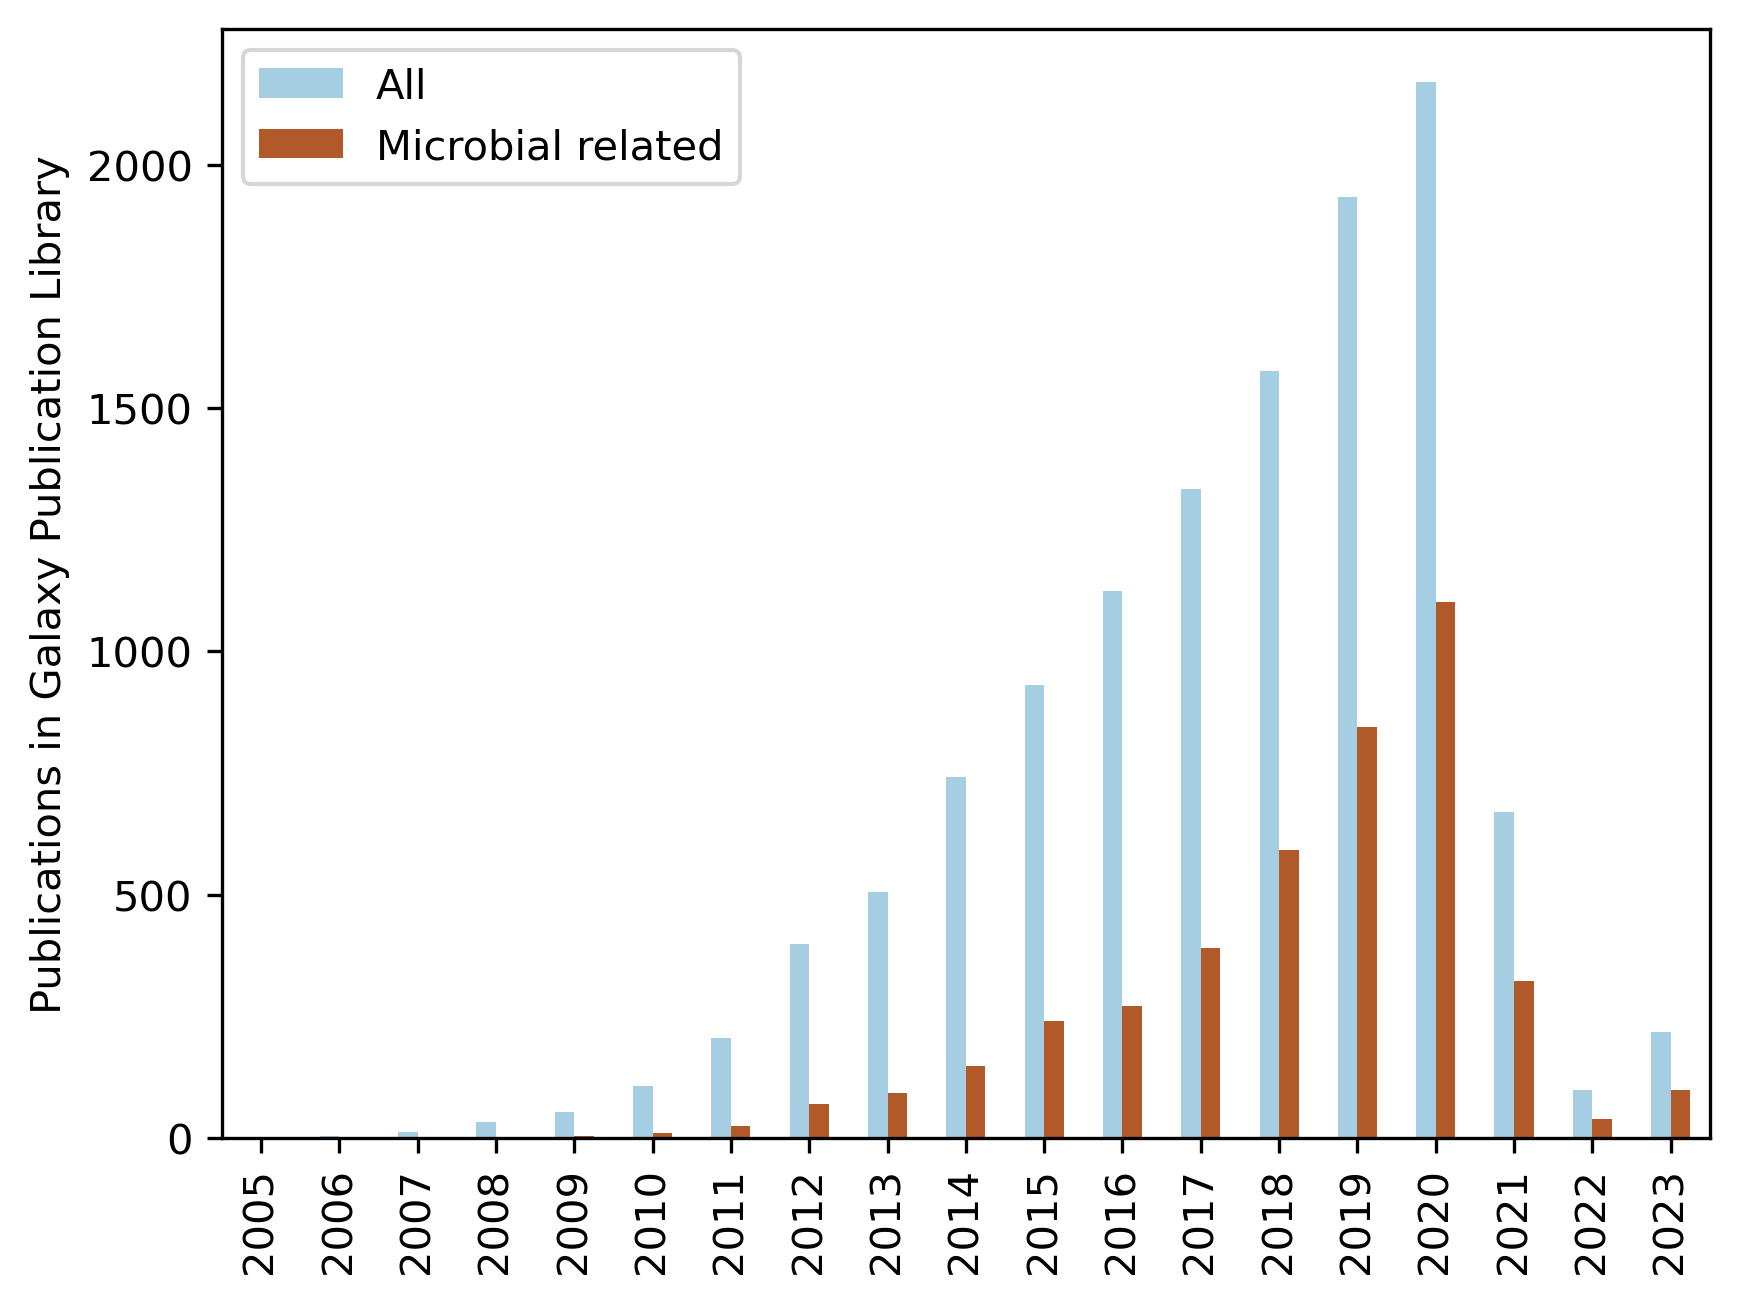

In [16]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(year_df
     .plot.bar(ax=ax, colormap='Paired'))
plt.ylabel('Publications in Galaxy Publication Library')

### Per keywords

We group the extracted publications by pre-defined groups given keywords in tags, title, and/or abstract.

In [63]:
grouping_keywords = {
    #'Paper type': {
    #    'Technical':{
    #        'keywords': ['+tools', '+methods', '+workbench'],
    #        'location': ['tag'],
    #        'counts': 0
    #    }
    #},
    'Targeted organisms': {
        'Bacteria': {
            'keywords': ['bacteri', 'prokaryot'],
            'location': ['tag', 'title', 'abstract'],
            'counts': 0
        },
        'Virus': {
            'keywords': ['virus', 'phage'],
            'location': ['tag', 'title', 'abstract'],
            'counts': 0
        },
        'Archaea': {
            'keywords': ['archae'],
            'location': ['tag', 'title', 'abstract'],
            'counts': 0
        },
        'Eukaryote': {
            'keywords': ['eukaryot'],
            'location': ['tag', 'title', 'abstract'],
            'counts': 0
        },
        'Microbiome': {
            'keywords': ['microbiome', 'microbiota', 'flora', 'ecology', 'community', 'communities'],
            'location': ['tag', 'title', 'abstract'],
            'counts': 0
        },
        'Pathogen': {
            'keywords': ['pathogen'],
            'location': ['tag', 'title', 'abstract'],
            'counts': 0
        }
    },
    'Technical target': {
        'Isolate': {
            'keywords': ['isolate'],
            'location': ['tag', 'title', 'abstract'],
            'counts': 0
        },
        'Community (taxonomy) profiling': {
            'keywords': ['otu', 'asv', 'taxonom', 'community', 'communities', 'ecosystem', 'diversity', 'ecology'],
            'location': ['tag', 'title', 'abstract'],
            'counts': 0
        },
        'Functional analysis': {
            'keywords': ['function'],
            'location': ['tag', 'title', 'abstract'],
            'counts': 0
        },
        'Interactome': {
            'keywords': ['interaction'],
            'location': ['tag', 'title', 'abstract'],
            'counts': 0
        },
        'AMR': {
            'keywords': ['antimicrobial', 'resistan', 'amr'],
            'location': ['tag', 'title', 'abstract'],
            'counts': 0
        },
        'MAGs': {
            'keywords': ['mags', 'metagenome-assembled genome', 'assembly'],
            'location': ['tag', 'title', 'abstract'],
            'counts': 0
        },
        'Gene identification / Biomarker': {
            'keywords': ['gene identification', 'biomarker'],
            'location': ['tag', 'title', 'abstract'],
            'counts': 0
        },
        'SNP': {
            'keywords': ['snp', 'single-nucleotide polymorphism'],
            'location': ['tag', 'title', 'abstract'],
            'counts': 0
        },
        '(M)LST': {
            'keywords': ['mlst', 'locus sequence typing'],
            'location': ['tag', 'title', 'abstract'],
            'counts': 0
        },
        'Annotation': {
            'keywords': ['annotation'],
            'location': ['tag', 'title', 'abstract'],
            'counts': 0
        },
        'Variant': {
            'keywords': ['variant'],
            'location': ['tag', 'title', 'abstract'],
            'counts': 0
        },
        'Comparative analysis': {
            'keywords': ['comparative'],
            'location': ['tag', 'title', 'abstract'],
            'counts': 0
        },
    },
    'Methods': {
        'Metabarcoding': {
            'keywords': ['metabarcod', '16s', '16 s', '18s', 'amplicon', 'metataxonom'],
            'location': ['tag', 'title', 'abstract'],
            'counts': 0
        },
        '(Meta)genomics': {
            'keywords': ['genom'],
            'location': ['tag', 'title', 'abstract'],
            'counts': 0
        },
        'Metagenomics': {
            'keywords': ['metagenom'],
            'location': ['tag', 'title', 'abstract'],
            'counts': 0
        },
        '(Meta)transcriptomics': {
            'keywords': ['transcriptom'],
            'location': ['tag', 'title', 'abstract'],
            'counts': 0
        },
        'Metatranscriptomics': {
            'keywords': ['metatranscriptom'],
            'location': ['tag', 'title', 'abstract'],
            'counts': 0
        },
        '(Meta)proteomics': {
            'keywords': ['proteom', 'mass spectrometry'],
            'location': ['tag', 'title', 'abstract'],
            'counts': 0
        },
        'Metaproteomics': {
            'keywords': ['metaproteom'],
            'location': ['tag', 'title', 'abstract'],
            'counts': 0
        },
        'Metabolomics': {
            'keywords': ['metabolom', 'metabolite'],
            'location': ['tag', 'title', 'abstract'],
            'counts': 0
        },
        'Imaging': {
            'keywords': ['imaging'],
            'location': ['tag', 'title', 'abstract'],
            'counts': 0
        },
    }    
}

In [64]:
def find_kw(string, kws):
    '''
    Return if a 1 keyword in a list is found in a string

    :param string: string to search
    :param kws: list of keywords to search
    '''
    found = False
    for kw in kws:
        if kw in string:
            found = True
    return found
    

not_grouped = []
for item in conserved_items:
    in_group = False
    for g, group in grouping_keywords.items():
        for sg, subgroup in group.items():
            found = False
            if 'tag' in subgroup['location']:
                for tag in item['data']['tags']:
                    found |= find_kw(tag['tag'].lower(), subgroup['keywords'])
            if 'title' in subgroup['location'] and 'title' in item['data']:
                found |= find_kw(item['data']['title'].lower(), subgroup['keywords'])
            if 'abstract' in subgroup['location'] and 'abstractNote' in item['data']:
                found |= find_kw(item['data']['abstractNote'].lower(), subgroup['keywords'])
            subgroup['counts'] += found
            in_group |= found

    if not in_group:
        not_grouped.append(item)

Number of elements not grouped

In [65]:
f'{len(not_grouped)} / {len(conserved_items)}'

'20 / 4252'

In [66]:
group_dfs = {}
for g, group in grouping_keywords.items():
    group_dfs[g] = (pd.DataFrame.from_dict(group, orient='index')
                    .assign(percentage=lambda df: 100*df.counts/len(conserved_items)))

Text(0, 0.5, '% in the microbial related publications from Galaxy Publication Library')

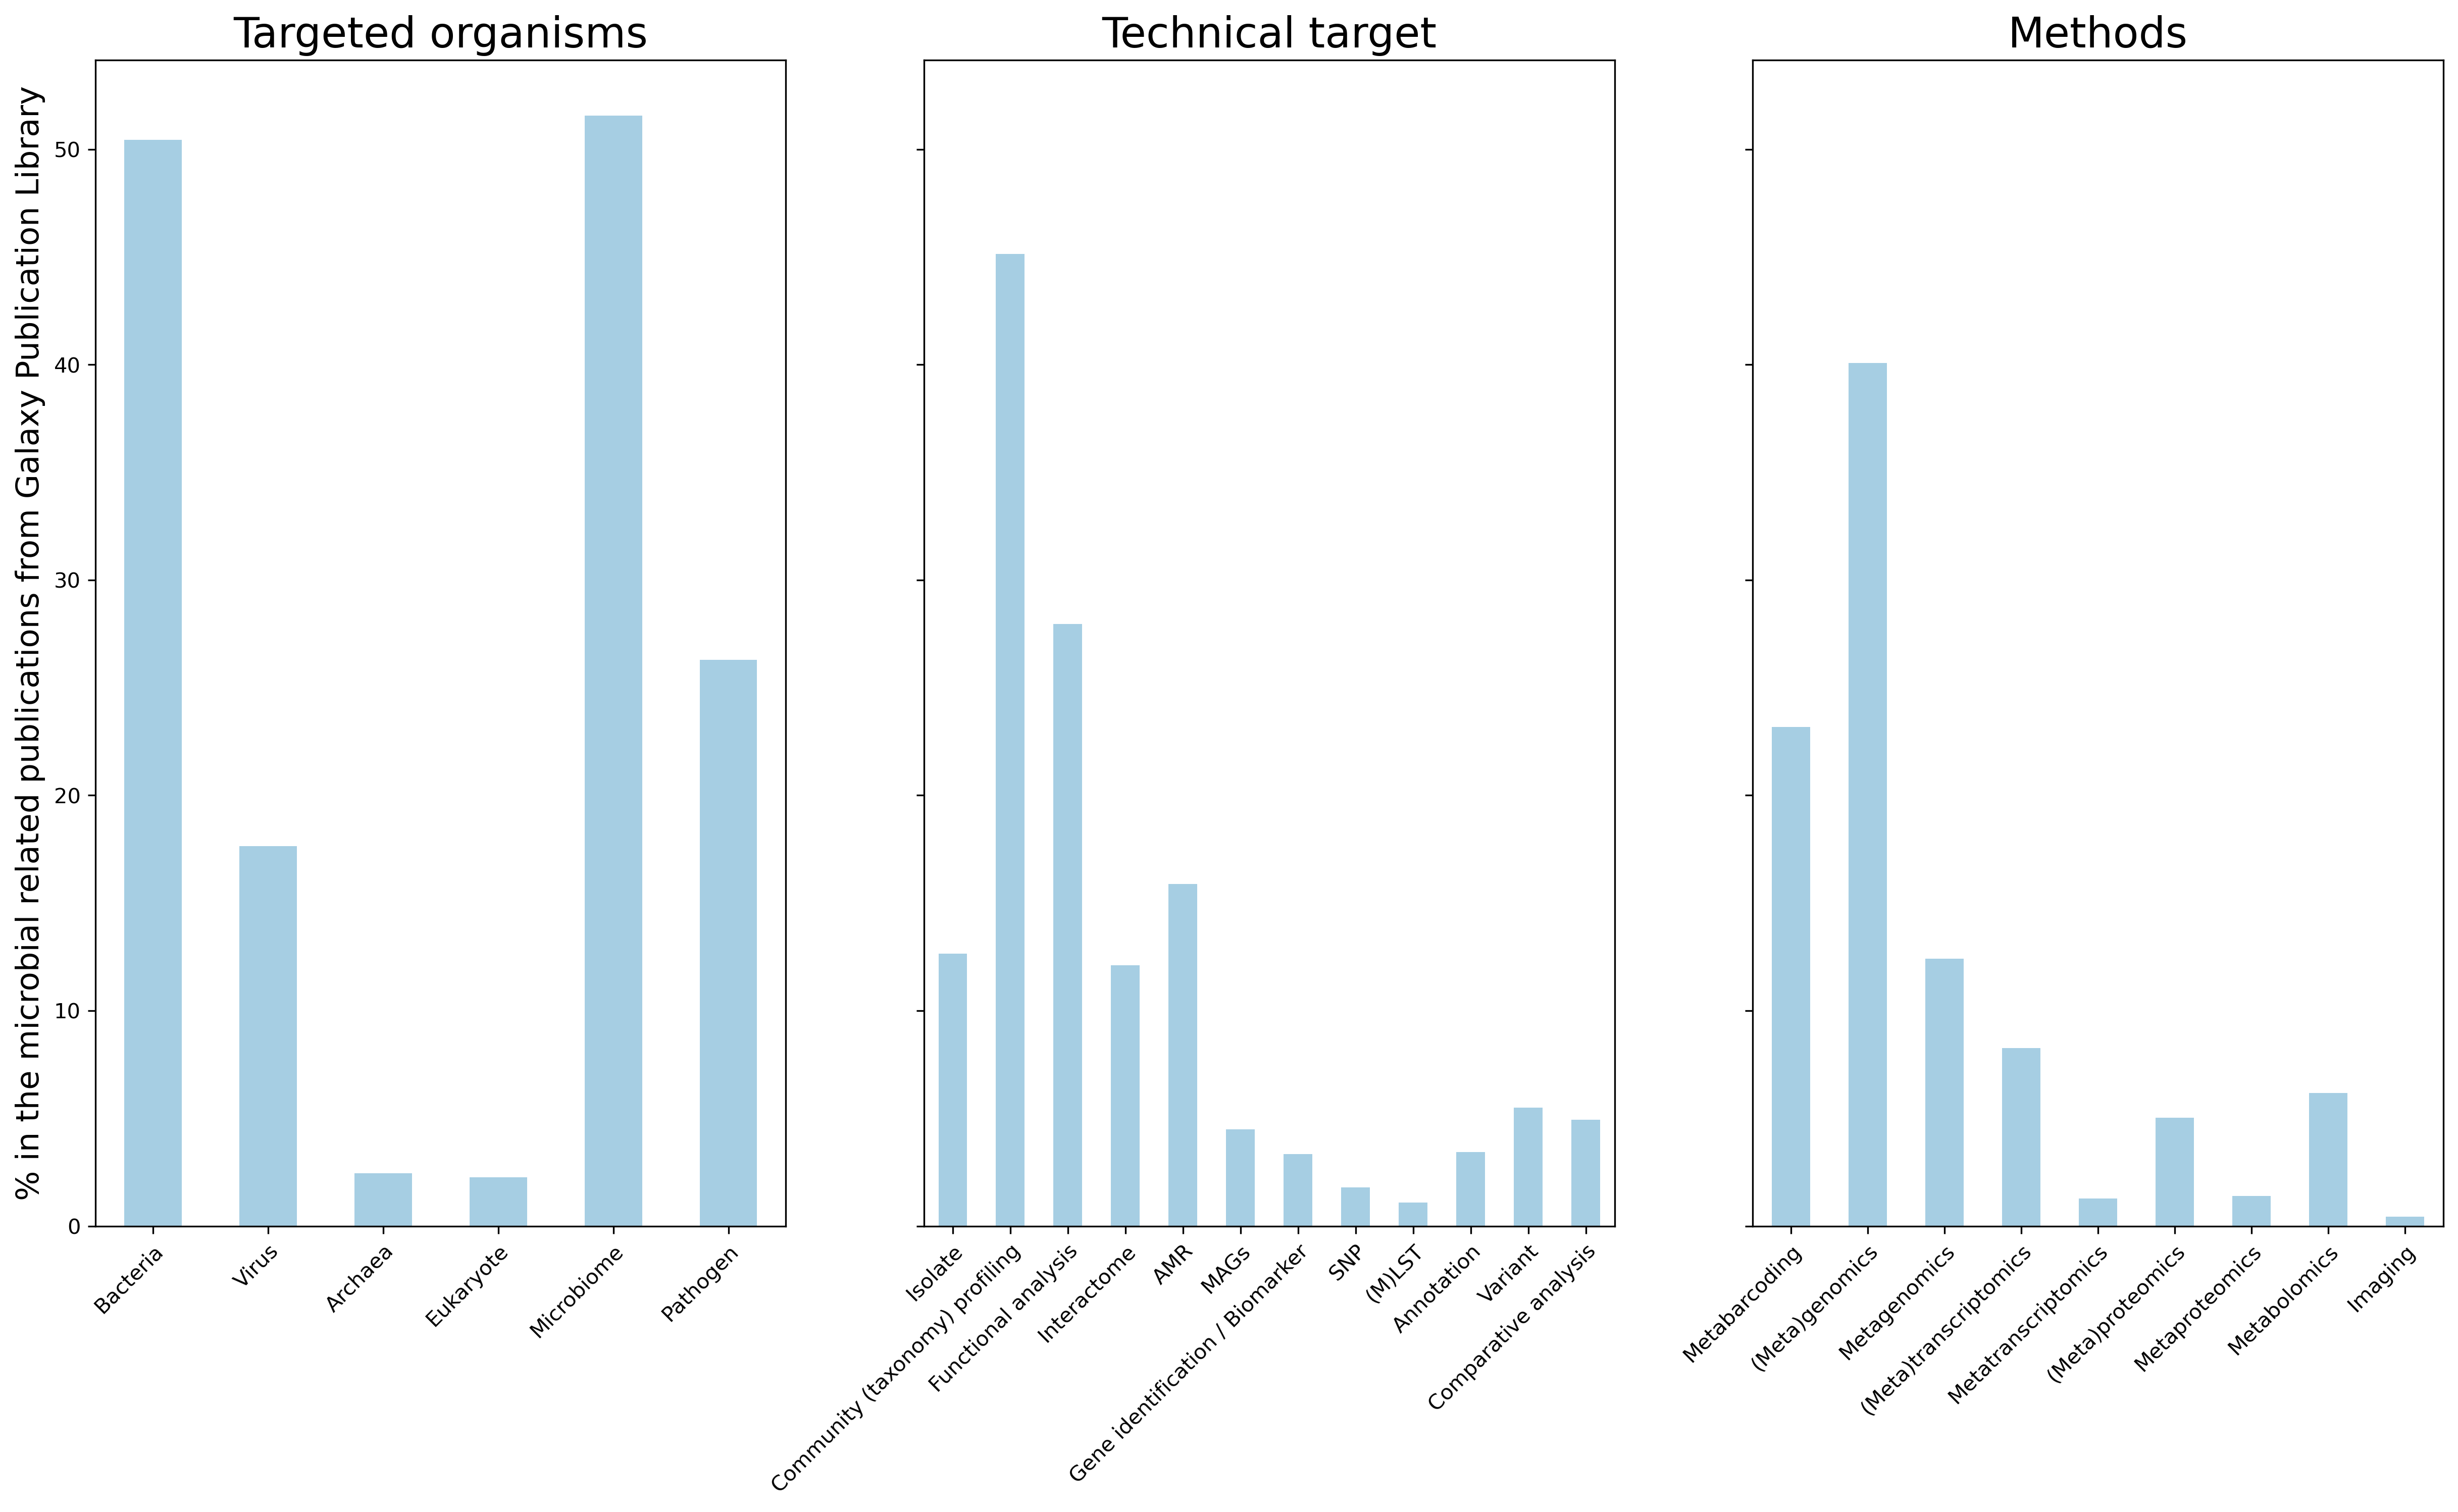

In [98]:
def plot_kw_percentage(group, dfs, ax):
    '''
    Plot percentage of publications with keywords related a group

    :param group: group
    :param dfs: dictionary with dataframes
    :param ax: axis
    '''    
    (dfs[group].percentage
         .plot.bar(ax=ax, colormap='Paired'))
    #plt.xticks(rotation=45, ha='right')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
    ax.set_title(group, fontsize=20)

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(20, 10))
fig.set_dpi(300)
for i, group in enumerate(group_dfs):
    plot_kw_percentage(group, group_dfs, axs[i])
axs[0].set_ylabel('% in the microbial related publications from Galaxy Publication Library', fontsize=15)